### Question 1: Fit a Linear Regression (20)

Complete each sub-questions with either codes or written answers. Make sure to print your result if necessary. We are going to use the data from Homework 1, the diabetes data. 

In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data.data, data.target
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

##### 1a. Plot a scatter plot between the target value and BMI. Show the estimated linear regression line and describe what you have seen.  

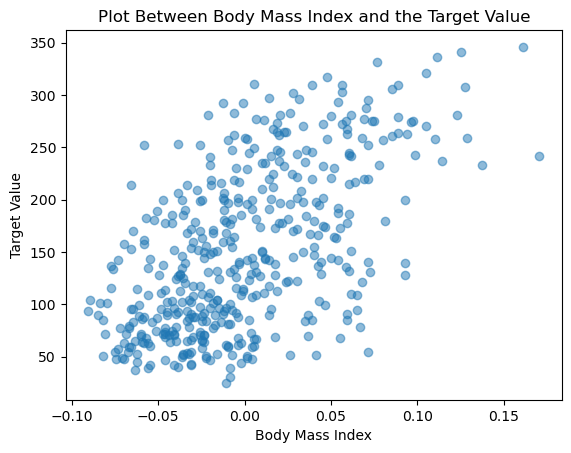

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np


# Convert the feature matrix X into a pandas DataFrame
df_diabetes = pd.DataFrame(X, columns=data.feature_names)
df_target = pd.DataFrame(y, columns=["target"])

# Combine the DataFrames horizontally (side by side)
df_complete_data = pd.concat([df_diabetes, df_target], axis=1)

plt.scatter(df_complete_data[['bmi']], df_complete_data[['target']], alpha = 0.5)

plt.xlabel('Body Mass Index')
plt.ylabel('Target Value')
plt.title('Plot Between Body Mass Index and the Target Value')
plt.show()

In [3]:
df_complete_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


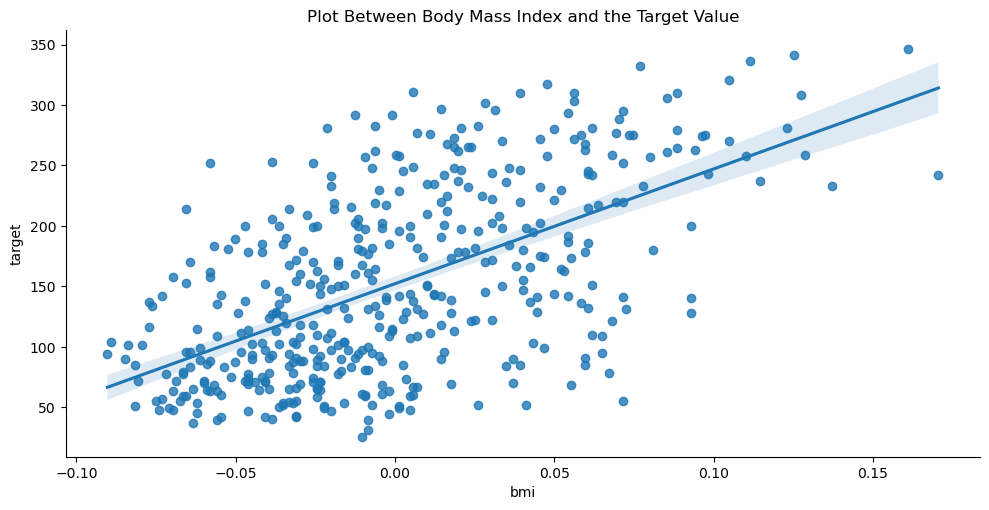

In [4]:
import seaborn as sns

sns.lmplot(x = 'bmi', y = 'target', data = df_complete_data, aspect = 2)
plt.title('Plot Between Body Mass Index and the Target Value')
plt.show()

The scatter plot and the linear regression line shows me me the best fit line for my bmi and target data points. There is a general positive trend where the targets tends to increase as the bmi increases. However, the relationship is not very strong since the data points are spreadout and the data are far away from the linear regression line as the bmi and target increases. There also is a lot of density between target points 50 to 150.

##### 1b. Plot a scatter plot between the target value and one other feature in the data. Show the estimated linear regression line and describe what you have seen. 

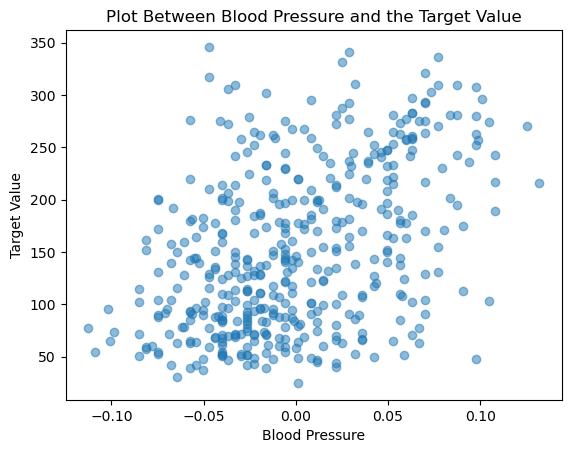

In [5]:
plt.scatter(df_complete_data[['bp']], df_complete_data[['target']], alpha = 0.5)

plt.xlabel('Blood Pressure')
plt.ylabel('Target Value')
plt.title('Plot Between Blood Pressure and the Target Value')
plt.show()

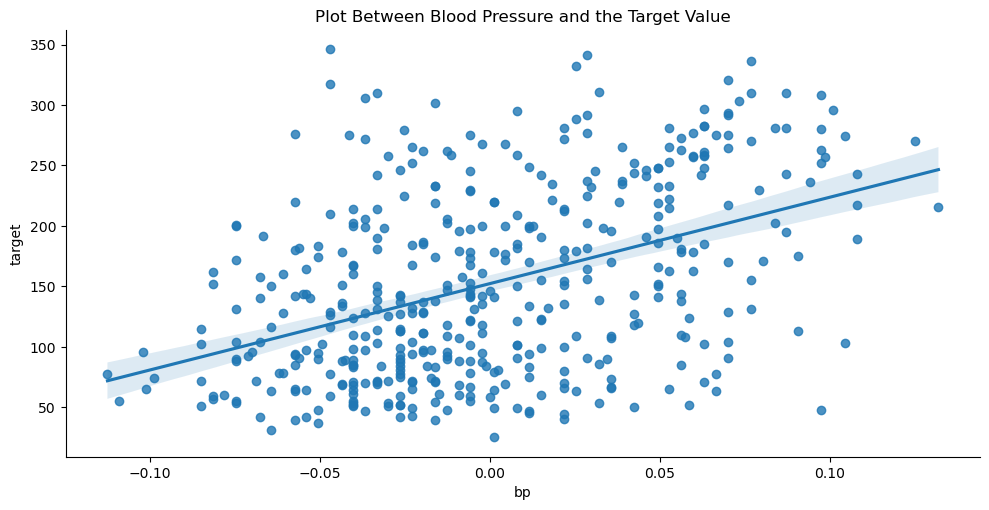

In [6]:
sns.lmplot(x = 'bp', y = 'target', data = df_complete_data, aspect = 2)
plt.title('Plot Between Blood Pressure and the Target Value')
plt.show()

The scatter plot and linear regression line shows me the best fit line for the blood pressure and target data points. There is a general positive trend where the targets tends to increase as the bmi increases. However, the relationship is not very strong since the data points are very spreadout and the data are far away from the linear regression line as the bmi and target increases.

##### 1c. Fit a linear model between the target value and BMI. Print the intercept and slope. Describe how BMI affects the target value. 

In [7]:
import sklearn
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the 'bmi' data and target values
X = df_complete_data.drop('target', axis = 1)
Y = df_complete_data.target


model.fit(X[['bmi']], Y)

print('The estimated intercept coefficient is %.3f' %model.intercept_)
print('The estimated coefficient for body mass index is %.3f' %model.coef_)

The estimated intercept coefficient is 152.133
The estimated coefficient for body mass index is 949.435


Keep in mind that the bmi data is scaled. In my findings, when the bmi is zero the y interecept for the target value is at 152.133. The slope is 949.435, which tells us how the target value changes for a one-unit change in BMI. The positive coefficient for BMI suggests that there is a positive linear relationship between BMI and the target value. In practical terms, this means that as BMI increases, the target value tends to increase.


##### 1d. For a linear model between the target value and all features. Print the coefficients for all features. 

In [8]:
# Create a linear regression model
model_2 = LinearRegression()

# Fit the model to all features except 'target'
X = df_complete_data.drop('target', axis=1)  # Drop 'target' column
Y = df_complete_data['target']

model_2.fit(X, Y)

# Print the estimated intercept coefficient
print('The estimated intercept coefficient is %.3f' % model_2.intercept_)

# Print the estimated coefficients for all features
for feature, coefficient in zip(X.columns, model_2.coef_):
    print('The estimated coefficient for {} is {:.3f}'.format(feature, coefficient))

The estimated intercept coefficient is 152.133
The estimated coefficient for age is -10.010
The estimated coefficient for sex is -239.816
The estimated coefficient for bmi is 519.846
The estimated coefficient for bp is 324.385
The estimated coefficient for s1 is -792.176
The estimated coefficient for s2 is 476.739
The estimated coefficient for s3 is 101.043
The estimated coefficient for s4 is 177.063
The estimated coefficient for s5 is 751.274
The estimated coefficient for s6 is 67.627


##### 1e. Do you think linear model is a good model to use in this case? (Think about whether linear regression assumptions are satisfied. )

From the output of my linear regression models, it seems like the linear model is a feasible model to use for this dataset. It is not the best fit, because the data is very scattered as shown in the linear regression line scatter plot. The coefficient for bmi is especially big, at around 949. However, there is correlation between the data such as the target value and bmi and also the target value and blood pressure.

### Question 2: Gradient Descent in Linear Regression (30)

Write Python code to implement the gradient descent method in linear regression. You can use the functions as a start (or you can start from scratch). Verify your code with sample data and LinearRegression in sklearn. 

In [9]:
# Generate a sample data with target y and feature X, feel free to change
x = np.random.normal(loc=5, scale=3, size=100)
y = 2 * x + np.random.normal(loc=0, scale=1, size=100)
X = np.column_stack((np.ones(100), x))

In [10]:
# Implement the gradient descent functions. Import any module if you need. 
import numpy as np

def compute_cost(predictions, y):
    '''
    This function takes in the parameters predictions and y to find the mse.
    The function returns the cost/mse
    '''
    
    cost = np.sqaure(np.subtract(y, preictions)).mean()
    
    return cost

def gradient_descent(X_b, y, theta, learning_rate = 0.01, num_iterations = 100):
    '''
    The function takes in values for X_bm, y, theta, learning rate, and num_iterations defined
    by the user. The function calculates the gradient descent and returns
    the theta and cost history.
    '''
    cost_history = []
    
    for i in range(num_iterations):
        prediction = np.dot(X_b, theta)
        error = prediction - y
        gradient = (2/len(y))* np.dot(X_b.T, error)
        theta = theta - learning_rate * gradient
        cost = (1/(2*len(y))) * np.sum(error**2)
        cost_history.append(cost)
        

    return theta, cost_history

In [11]:
# Initialize theta with zeros or other initial values
theta = np.zeros(X.shape[1])  # Assuming two parameters (intercept and coefficient)
learning_rate = 0.01
num_iterations = 1200

final_theta, cost_history = gradient_descent(X, y, theta, learning_rate, num_iterations)

print("Final theta:", final_theta)
print("Final cost (MSE):", cost_history[-1])

Final theta: [0.12180047 2.01249036]
Final cost (MSE): 0.41799804963979326


Now I will verify my code with sample data and LinearRegression from sklearn.

In [12]:
# Reshape x to a column vector and create the feature matrix X
X = x.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the intercept and slope (coefficients)
intercept = model.intercept_
slope = model.coef_[0]

# Print the results
print("Intercept from Linear Regression Model:", intercept)
print("Slope (Coefficient for x) from Linear Regression Model:", slope)

Intercept from Linear Regression Model: 0.12149606798537427
Slope (Coefficient for x) from Linear Regression Model: 2.012532514540605


### Question 3 MLE for Poisson Regression (30)

In the lecture we have showed you how to achieve the MLE for the linear regression. Now let's try to replicate it with another regression: Poisson regression. We will discuss it more later so don't worry if you have never heard about it. 

Poisson regression only has one parameter $\lambda$, which is also the mean of the distribution (like the $\mu$ in the linear regression). The pdf is 
$$f(X_i|\lambda) = \frac{\lambda^{X_i} e^{-\lambda}}{X_i!}$$
while $X_i!$ is the factorial of $X_i$. 

Now try to esimate the MLE for the $\lambda$ in Poisson regression. Latex is preferred but written and submitted by picture is also accpetable. (Hint: review the lecture note and follow the steps: write the likelihood, calculate the log-likelihood, take the derivative and solve the equation when the derivative is equal to 0. The answer is a simple one and there is no factorial included.)

### Question 4 Another MLE practice (20)

Let's make a random pdf, when $0 \leq X_i \leq \theta$, we have:

$$f(X_i|\theta ) = 2 * \frac{(\theta - X_i)}{\theta^2} $$

For all the other value, let $f(y_i|X_i, \theta) = 0$. 

1. First, prove it is a valid pdf. Hint: a valid pdf means all the values are positive and the interval of pdf should be equal to 1. 
2. Calculate the MLE estimator. Stop after taking the deriative since the equation doesn't have a simple closed-form solution